In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'nearest'

import numpy as np
from matplotlib import pyplot as plt

In [2]:
from skimage import io

#image = io.imread("D:/Dropbox/Dropbox/devils_kitchen/Thesis/DJI_0095_CLIP.jpg")
image = io.imread("D:/janni/Documents/Geographie/Masterarbeit/Data/ResearchArea/RA1/orthoClipRA1_badRes.jpg")
#image = io.imread('/home/hre070/MA/dji_full.jpg')
#image = io.imread('/home/hre070/MA/Pics_Kalkofen/DJI_0095.JPG')

print(type(image))
print(image.size)



<class 'numpy.ndarray'>
35424000


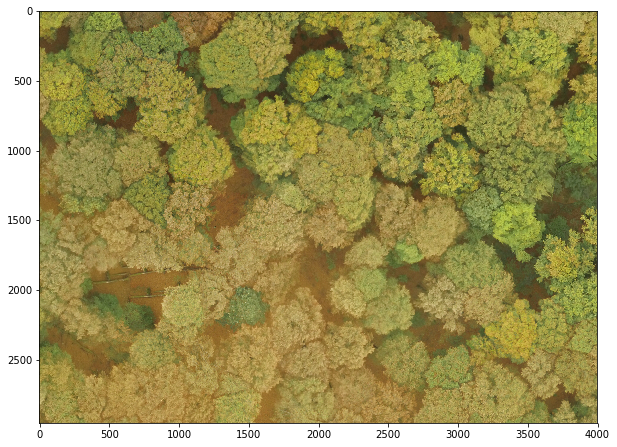

In [3]:
f, ax = plt.subplots(figsize=(10, 10))

ax.imshow(image);

# Superpixel, Words

In [4]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.segmentation import quickshift
from skimage.util import img_as_float

In [5]:
#SLIC
#segments_slic = slic(image, n_segments=400, compactness=30, sigma=1)
#print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))

# Quickshift
image = img_as_float(image[::2, ::2])
#segments_slic = quickshift(image, kernel_size = 16, max_dist = 32, ratio = 0.5)
segments_slic = np.load("D:/janni/Documents/Geographie/Masterarbeit/Data/ResearchArea/RA1/quickshift16_32.npy")
print('QUICKSHIFT number of segments: {}'.format(len(np.unique(segments_slic))))

QUICKSHIFT number of segments: 270


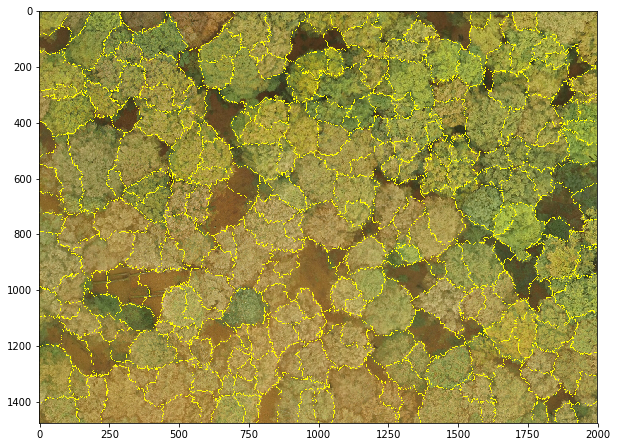

In [6]:
f, ax = plt.subplots(figsize=(10, 10))

ax.imshow(mark_boundaries(image, segments_slic));


In [31]:
#np.save("D:/janni/Documents/Geographie/Masterarbeit/Data/ResearchArea/RA1/quickshift16_32.npy", segments_slic, allow_pickle=False, fix_imports=False)

In [7]:
#IMPORTS
import sys
sys.path.append("D:/janni/Documents/Geographie/Masterarbeit/src/github")
sys.path.append("D:/janni/Documents/Geographie/Masterarbeit/src/github/_LBP")
import lbp
from skimage.transform import rotate
from skimage.color import label2rgb
from skimage.color import rgb2gray

im_gray = rgb2gray(image)

print(im_gray.max(), im_gray.min())

0.848042352941 0.144198039216


In [8]:
from frequency import frequency_setup

tex_info = frequency_setup(im_gray, 5, 70, 100, 1.0, 0.1)
print(tex_info.lbp_radius)



8


In [9]:
# settings for LBP
METHOD = 'default'
radius = 5
n_points = 8

lbp_img = lbp.local_binary_pattern(tex_info.result(), None, n_points, radius, METHOD)


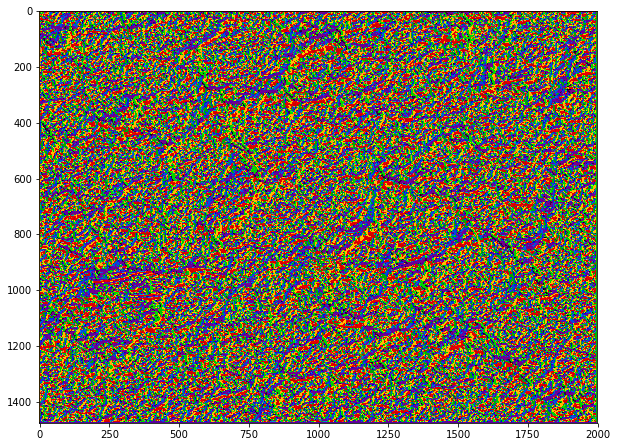

In [10]:
f, ax = plt.subplots(figsize=(10, 10))

#ax.imshow(image)
ax.imshow(lbp_img, cmap=plt.cm.spectral, alpha=1 )

### Graph:

In [11]:
import networkx as nx

#from bowrag import BOW_RAG, cumu_diff
import bow_rag
import bow_diff

In [12]:
import lbp_bins

In [13]:
BINS = lbp_bins.lbp_bins(n_points, "default")

#BINS

In [64]:
Graph = bow_rag.BOW_RAG(seg_img = segments_slic, tex_img = lbp_img, color_image = image, tex_bins=BINS, color_bins = 256)

In [15]:
Graph.node[151]

{'color': [<bow_container.hist at 0x212d41800b8>,
 'labels': [151],
 'pixel_count': 13306,
 'tex': <bow_container.hist at 0x212d41804a8>}

In [65]:
from bow_diff import config_weighting
from histogram import Correlation

wf_both_g = config_weighting(attr_dict={'tex': (Correlation, 0), 'color': (Correlation, 1) }, mode="graph")
wf_both_m = config_weighting(attr_dict={'tex': (Correlation, 0), 'color': (Correlation, 1) }, mode="merge")

#print(wf_both_m)

In [66]:
Graph.calc_edge_weights(wf_both_g)

In [70]:
Graph.calc_edge_weight_stats()

In [71]:
Graph.edge_weight_stats


{'max': 0.58267132120056342,
 'mean': 0.41313283923556471,
 'median': 0.4059996198502096,
 'min': 0.19673725580945869,
 'stdev': 0.07602274895267501}

(array([   5.,   21.,   27.,   97.,  167.,  136.,  103.,   66.,   88.,   32.]),
 array([ 0.19673726,  0.23533066,  0.27392407,  0.31251748,  0.35111088,
         0.38970429,  0.4282977 ,  0.4668911 ,  0.50548451,  0.54407791,
         0.58267132]),
 <a list of 10 Patch objects>)

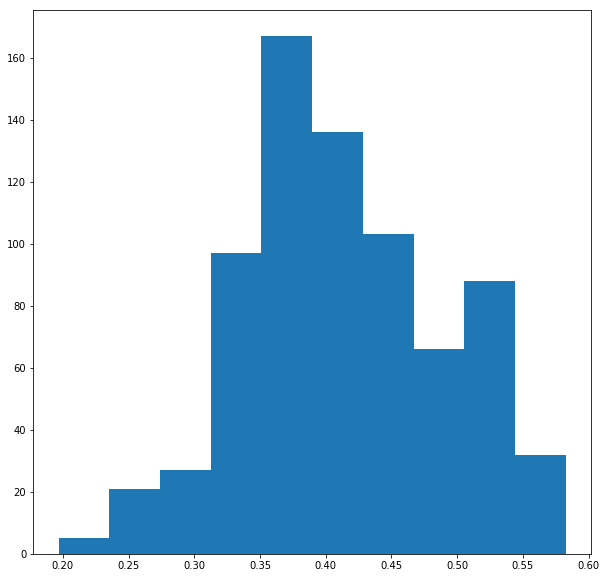

In [72]:
f, ax = plt.subplots(figsize=(10, 10))

#ax.imshow(image)
ax.hist(Graph.get_edge_weight_list())

## Merging:

In [21]:
from skimage.future import graph
from skimage import segmentation, color

In [77]:
th = Graph.get_edge_weight_percentile(10, as_threshhold=True)
print(th)

0.324381111465


In [23]:
import bow_rag
import merge_regionGrowing
from skimage.future import graph

In [78]:
merged = graph.merge_hierarchical(segments_slic, Graph, thresh=th, rag_copy=True,
                                   in_place_merge=True,
                                   merge_func=bow_rag._bow_merge_simple,
                                   weight_func=wf_both_m)



In [79]:
out = color.label2rgb(merged, image, kind='avg')
out = segmentation.mark_boundaries(out, merged, (0, 0, 0))

## Output:

### Original Image

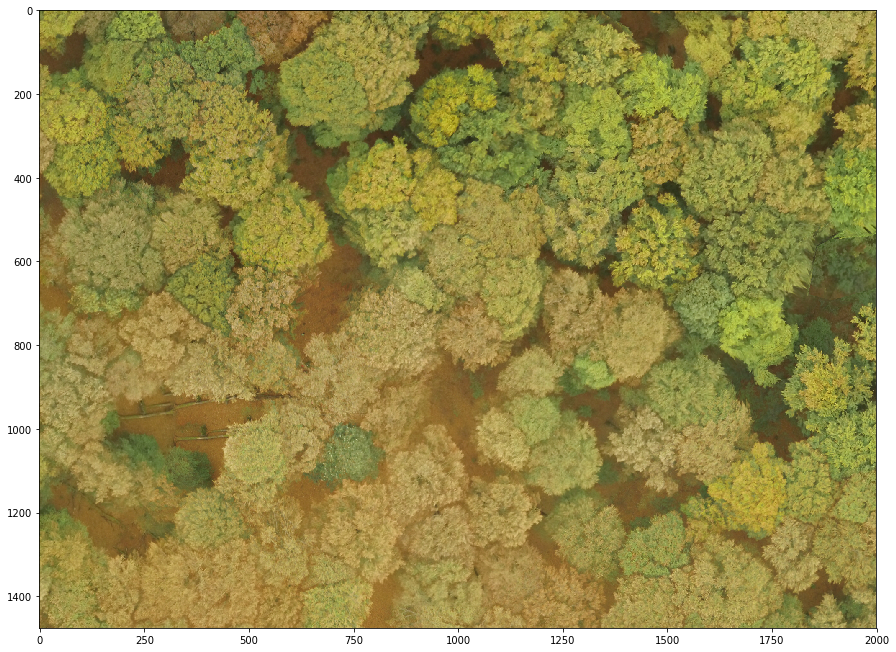

In [26]:
f, ax = plt.subplots(figsize=(15, 15))

ax.imshow(image);

### Segmented Image

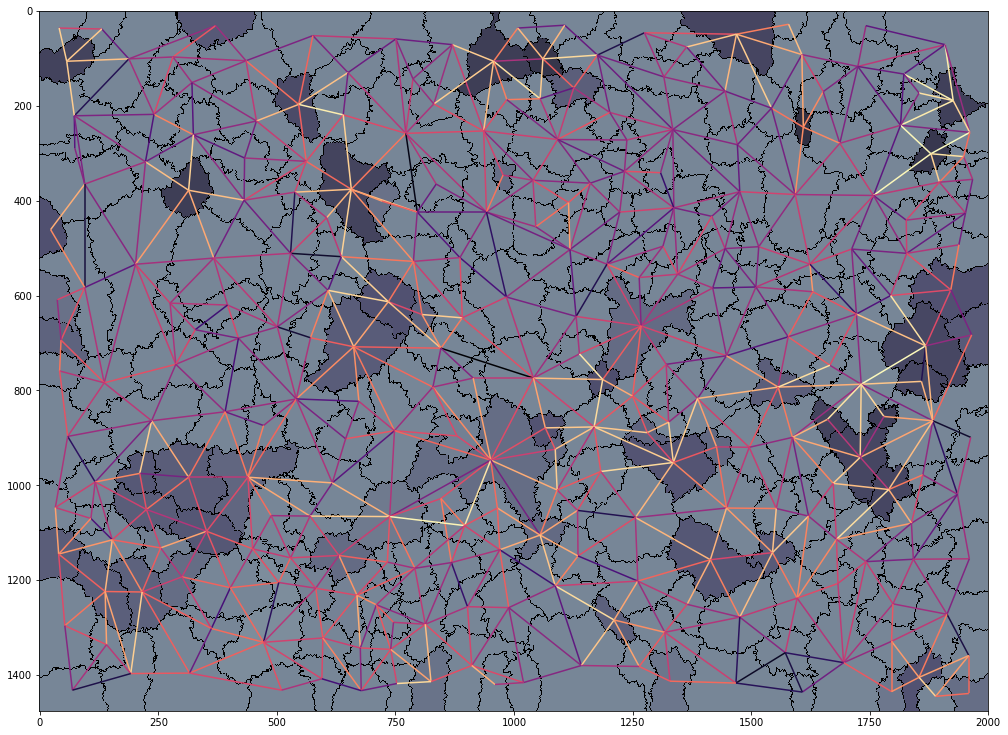

In [80]:
f, ax = plt.subplots(figsize=(17, 17))
graph.show_rag(segments_slic, Graph, out, ax= ax)

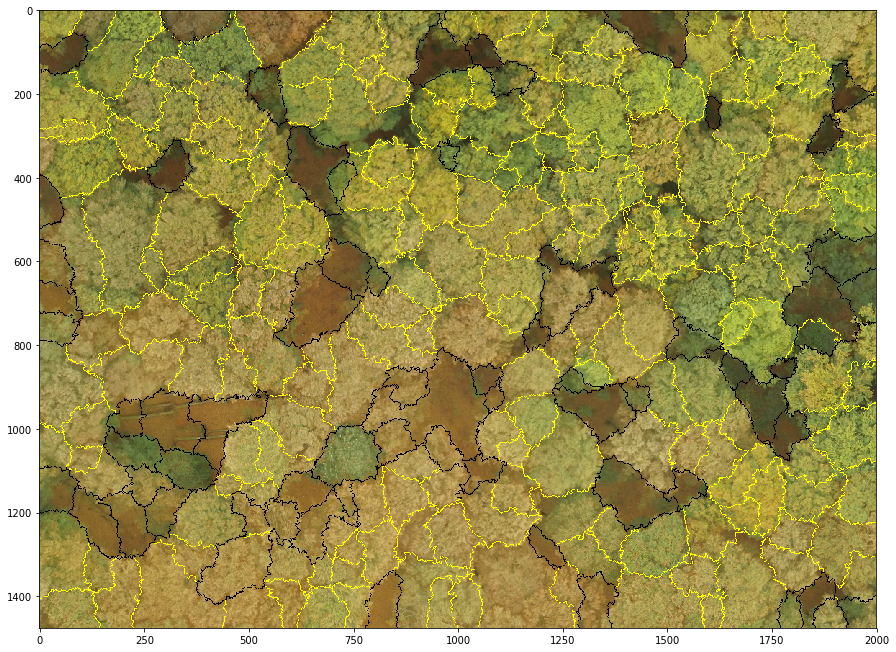

In [81]:
f, ax = plt.subplots(figsize=(15, 15))

ax.imshow(mark_boundaries(mark_boundaries(image, segments_slic), merged, (255,0,0)))

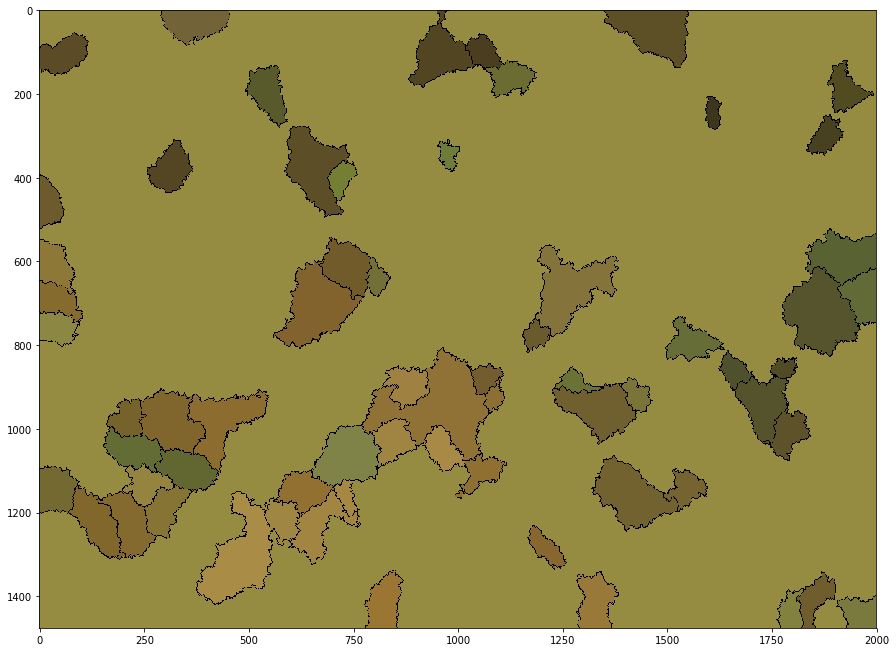

In [82]:
f, ax = plt.subplots(figsize=(15, 15))

ax.imshow(out);

In [83]:
method = quickshift

7

### Local Binary Pattern

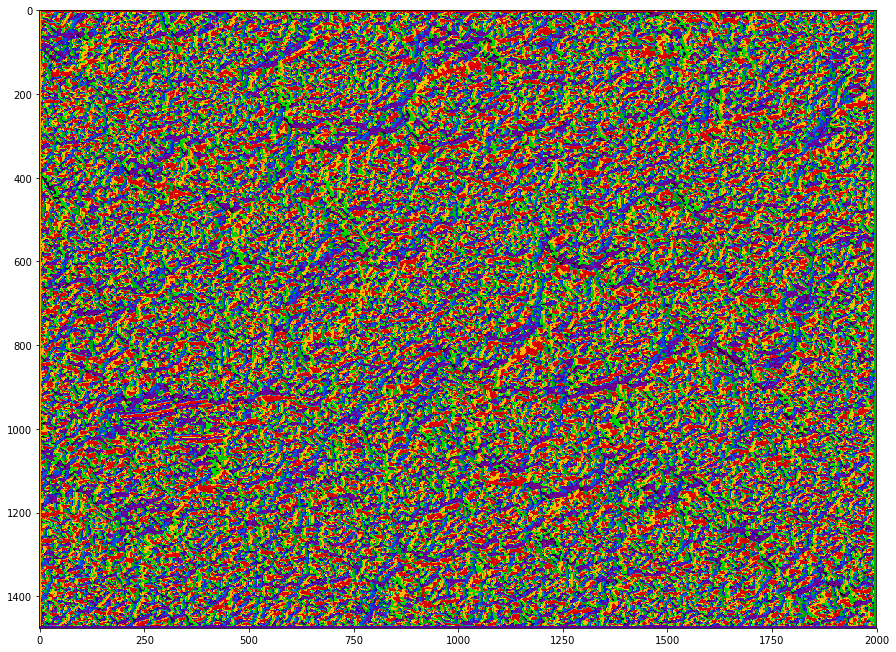

In [29]:
f, ax = plt.subplots(figsize=(15, 15))

ax.imshow(lbp_img, cmap=plt.cm.spectral, alpha=1 )

### Merged Result

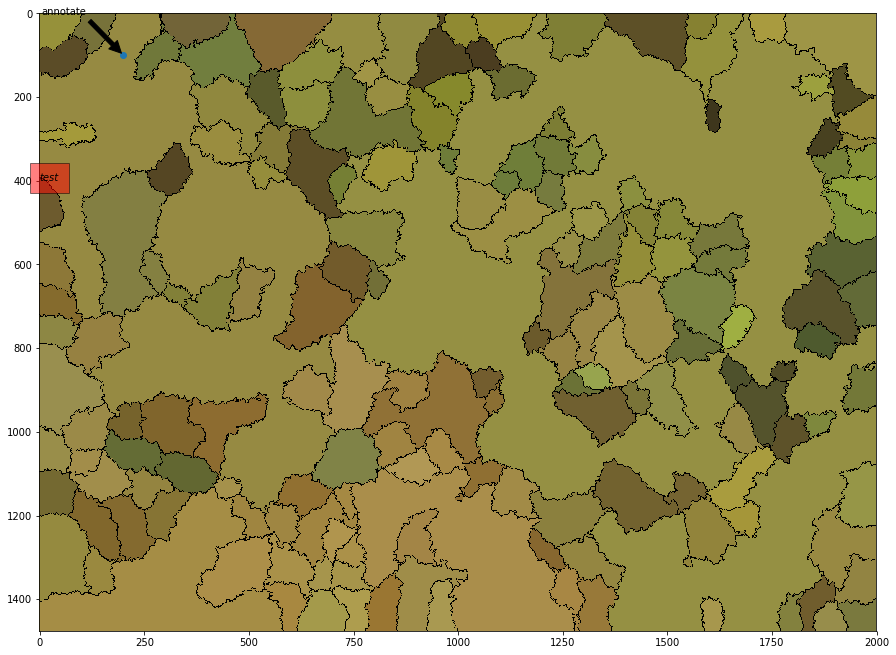

In [30]:
f, ax = plt.subplots(figsize=(15, 15))

ax.imshow(out);
ax.text(0, 400, 'test', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.plot([200], [100], 'o')
ax.annotate('annotate', xy=(200, 100), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

In [30]:
Weiterhin:
    
    - Label funktion
    - Seeds plotten
    - Automatisches Seed clustering
    - Ini datei
    - LBP Parameter testen
@debug_func   
result = tolle_segemnte(bla, bla ,blub)    

SyntaxError: invalid syntax (<ipython-input-30-95a4f3f32dbc>, line 1)